In [1]:
from vllm import LLM, SamplingParams
import matplotlib.pyplot as plt
import time

In [2]:
prompts = [
    "Hello, my name is",
    "The president of the United States is",
    "The capital of France is",
    "The future of AI is",
]
# constants
max_tokens = 50
sampling_params = SamplingParams(temperature=0.8, top_p=0.95, max_tokens=max_tokens)

In [3]:
model_path = "/root/autodl-fs/data2/anti_fraud/models/modelscope/hub/hub/Qwen/Qwen2-7B"

llm = LLM(model=model_path, gpu_memory_utilization=0.9)


INFO 03-14 14:36:27 __init__.py:207] Automatically detected platform cuda.
INFO 03-14 14:36:34 config.py:549] This model supports multiple tasks: {'reward', 'classify', 'embed', 'score', 'generate'}. Defaulting to 'generate'.
WARNING 03-14 14:36:34 arg_utils.py:1187] Chunked prefill is enabled by default for models with max_model_len > 32K. Currently, chunked prefill might not work with some features or models. If you encounter any issues, please disable chunked prefill by setting --enable-chunked-prefill=False.
INFO 03-14 14:36:34 config.py:1555] Chunked prefill is enabled with max_num_batched_tokens=2048.
INFO 03-14 14:36:34 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='/root/autodl-fs/data2/anti_fraud/models/modelscope/hub/hub/Qwen/Qwen2-7B', speculative_config=None, tokenizer='/root/autodl-fs/data2/anti_fraud/models/modelscope/hub/hub/Qwen/Qwen2-7B', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_

Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]


INFO 03-14 14:41:52 model_runner.py:1115] Loading model weights took 14.2717 GB
INFO 03-14 14:41:53 worker.py:267] Memory profiling takes 0.91 seconds
INFO 03-14 14:41:53 worker.py:267] the current vLLM instance can use total_gpu_memory (79.33GiB) x gpu_memory_utilization (0.90) = 71.39GiB
INFO 03-14 14:41:53 worker.py:267] model weights take 14.27GiB; non_torch_memory takes 0.09GiB; PyTorch activation peak memory takes 1.40GiB; the rest of the memory reserved for KV Cache is 55.63GiB.
INFO 03-14 14:41:54 executor_base.py:111] # cuda blocks: 65099, # CPU blocks: 4681
INFO 03-14 14:41:54 executor_base.py:116] Maximum concurrency for 131072 tokens per request: 7.95x
INFO 03-14 14:41:56 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:14<00:00,  2.40it/s]

INFO 03-14 14:42:11 model_runner.py:1562] Graph capturing finished in 15 secs, took 0.78 GiB
INFO 03-14 14:42:11 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 18.74 seconds


In [4]:
# observations
durations = []
throughputs = []
latencies = []

batch_sizes = [2**p for p in range(10)]
for batch_size in batch_sizes:
    print(f"bs={batch_size}")

    # generate tokens for batch and record duration
    t0 = time.time()
    batch_prompt = [
        prompts[i % len(prompts)] for i in range(batch_size)
    ]

    outputs = llm.generate(batch_prompt, sampling_params)

    duration_s = time.time() - t0

    # calculate throughput
    ntokens = batch_size * max_tokens
    throughput = ntokens / duration_s
    avg_latency = duration_s / max_tokens
    print(f"duration: {duration_s}")
    print(f"throughput: {throughput} tokens/s")
    print(f"avg latency: {avg_latency}")
    print()

    durations.append(duration_s)
    throughputs.append(throughput)
    latencies.append(avg_latency)


bs=1


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s, est. speed input: 7.86 toks/s, output: 78.63 toks/s]


duration: 0.6441123485565186
throughput: 77.62620932831359 tokens/s
avg latency: 0.01288224697113037

bs=2


Processed prompts: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s, est. speed input: 19.01 toks/s, output: 158.41 toks/s]


duration: 0.6360719203948975
throughput: 157.2149261641926 tokens/s
avg latency: 0.01272143840789795

bs=4


Processed prompts: 100%|██████████| 4/4 [00:00<00:00,  6.46it/s, est. speed input: 35.56 toks/s, output: 323.25 toks/s]


duration: 0.6239602565765381
throughput: 320.53323571814224 tokens/s
avg latency: 0.012479205131530762

bs=8


Processed prompts: 100%|██████████| 8/8 [00:00<00:00, 12.27it/s, est. speed input: 67.48 toks/s, output: 613.48 toks/s]


duration: 0.6578361988067627
throughput: 608.0541033247378 tokens/s
avg latency: 0.013156723976135255

bs=16


Processed prompts: 100%|██████████| 16/16 [00:00<00:00, 23.15it/s, est. speed input: 127.34 toks/s, output: 1122.91 toks/s]


duration: 0.6966214179992676
throughput: 1148.399947704222 tokens/s
avg latency: 0.01393242835998535

bs=32


Processed prompts: 100%|██████████| 32/32 [00:00<00:00, 40.61it/s, est. speed input: 223.40 toks/s, output: 2030.90 toks/s]


duration: 0.7952418327331543
throughput: 2011.9665919749027 tokens/s
avg latency: 0.015904836654663086

bs=64


Processed prompts: 100%|██████████| 64/64 [00:00<00:00, 64.36it/s, est. speed input: 354.04 toks/s, output: 3205.40 toks/s]


duration: 1.0049612522125244
throughput: 3184.202368951912 tokens/s
avg latency: 0.020099225044250487

bs=128


Processed prompts: 100%|██████████| 128/128 [00:01<00:00, 96.25it/s, est. speed input: 529.43 toks/s, output: 4811.45 toks/s]


duration: 1.3500497341156006
throughput: 4740.56609787976 tokens/s
avg latency: 0.027000994682312013

bs=256


Processed prompts: 100%|██████████| 256/256 [00:02<00:00, 111.41it/s, est. speed input: 612.80 toks/s, output: 5557.83 toks/s]


duration: 2.33392596244812
throughput: 5484.321356352591 tokens/s
avg latency: 0.0466785192489624

bs=512


Processed prompts: 100%|██████████| 512/512 [00:04<00:00, 110.11it/s, est. speed input: 605.61 toks/s, output: 5502.93 toks/s]

duration: 4.719951868057251
throughput: 5423.784122302301 tokens/s
avg latency: 0.09439903736114502



In [5]:
# save observations and restart kernel
# save as json
import json

data = {
    "durations": durations,
    "throughputs": throughputs,
    "latencies": latencies,
    "batch_sizes": batch_sizes,
    "prompts": prompts,
    "max_tokens": max_tokens
    
}

with open("single_gpu_inference_observation.json", "w") as f:
    json.dump(data, f)



In [1]:
import json

# Read the data from the JSON file
with open("single_gpu_inference_observation.json", "r") as f:
    data = json.load(f)

# Restore the lists
durations = data["durations"]
throughputs = data["throughputs"]
latencies = data["latencies"]
batch_sizes = data["batch_sizes"]
prompts = data["prompts"]
max_tokens = data["max_tokens"]

In [2]:
from vllm import LLM, SamplingParams
import matplotlib.pyplot as plt
import time

In [3]:
sampling_params = SamplingParams(temperature=0.8, top_p=0.95, max_tokens=max_tokens)

In [4]:
# 使用两张GPU
model_path = "/root/autodl-fs/data2/anti_fraud/models/modelscope/hub/hub/Qwen/Qwen2-7B"

llm_with_2_gpu = LLM(model=model_path, gpu_memory_utilization=0.9, tensor_parallel_size=2)

INFO 03-14 14:43:39 __init__.py:207] Automatically detected platform cuda.
INFO 03-14 14:43:46 config.py:549] This model supports multiple tasks: {'classify', 'embed', 'reward', 'score', 'generate'}. Defaulting to 'generate'.
INFO 03-14 14:43:46 config.py:1382] Defaulting to use mp for distributed inference
WARNING 03-14 14:43:46 arg_utils.py:1187] Chunked prefill is enabled by default for models with max_model_len > 32K. Currently, chunked prefill might not work with some features or models. If you encounter any issues, please disable chunked prefill by setting --enable-chunked-prefill=False.
INFO 03-14 14:43:46 config.py:1555] Chunked prefill is enabled with max_num_batched_tokens=2048.
INFO 03-14 14:43:46 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='/root/autodl-fs/data2/anti_fraud/models/modelscope/hub/hub/Qwen/Qwen2-7B', speculative_config=None, tokenizer='/root/autodl-fs/data2/anti_fraud/models/modelscope/hub/hub/Qwen/Qwen2-7B', skip_tokenizer_init

Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]


INFO 03-14 14:48:09 model_runner.py:1115] Loading model weights took 7.1441 GB
(VllmWorkerProcess pid=3798) INFO 03-14 14:48:09 model_runner.py:1115] Loading model weights took 7.1441 GB
(VllmWorkerProcess pid=3798) INFO 03-14 14:48:12 worker.py:267] Memory profiling takes 2.93 seconds
(VllmWorkerProcess pid=3798) INFO 03-14 14:48:12 worker.py:267] the current vLLM instance can use total_gpu_memory (79.33GiB) x gpu_memory_utilization (0.90) = 71.39GiB
(VllmWorkerProcess pid=3798) INFO 03-14 14:48:12 worker.py:267] model weights take 7.14GiB; non_torch_memory takes 1.54GiB; PyTorch activation peak memory takes 0.19GiB; the rest of the memory reserved for KV Cache is 62.52GiB.
INFO 03-14 14:48:12 worker.py:267] Memory profiling takes 2.96 seconds
INFO 03-14 14:48:12 worker.py:267] the current vLLM instance can use total_gpu_memory (79.33GiB) x gpu_memory_utilization (0.90) = 71.39GiB
INFO 03-14 14:48:12 worker.py:267] model weights take 7.14GiB; non_torch_memory takes 1.54GiB; PyTorch ac

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:15<00:00,  2.30it/s]

INFO 03-14 14:48:31 custom_all_reduce.py:226] Registering 1995 cuda graph addresses


(VllmWorkerProcess pid=3798) INFO 03-14 14:48:33 custom_all_reduce.py:226] Registering 1995 cuda graph addresses
(VllmWorkerProcess pid=3798) INFO 03-14 14:48:33 model_runner.py:1562] Graph capturing finished in 18 secs, took 0.90 GiB
INFO 03-14 14:48:34 model_runner.py:1562] Graph capturing finished in 18 secs, took 0.90 GiB
INFO 03-14 14:48:34 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 24.86 seconds


In [5]:
# observations
durations_2_gpu = []
throughputs_2_gpu = []
latencies_2_gpu = []

for batch_size in batch_sizes:
    print(f"bs={batch_size}")

    # generate tokens for batch and record duration
    t0 = time.time()
    batch_prompt = [
        prompts[i % len(prompts)] for i in range(batch_size)
    ]

    outputs = llm_with_2_gpu.generate(batch_prompt, sampling_params)

    duration_s = time.time() - t0

    # calculate throughput
    ntokens = batch_size * max_tokens
    throughput = ntokens / duration_s
    avg_latency = duration_s / max_tokens
    print(f"duration: {duration_s}")
    print(f"throughput: {throughput} tokens/s")
    print(f"avg latency: {avg_latency}")
    print()

    durations_2_gpu.append(duration_s)
    throughputs_2_gpu.append(throughput)
    latencies_2_gpu.append(avg_latency)

bs=1


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s, est. speed input: 6.81 toks/s, output: 68.10 toks/s]


duration: 0.7430768013000488
throughput: 67.28779570634231 tokens/s
avg latency: 0.014861536026000977

bs=2


Processed prompts: 100%|██████████| 2/2 [00:00<00:00,  4.11it/s, est. speed input: 24.70 toks/s, output: 205.79 toks/s]


duration: 0.4903137683868408
throughput: 203.95103390428028 tokens/s
avg latency: 0.009806275367736816

bs=4


Processed prompts: 100%|██████████| 4/4 [00:00<00:00,  8.43it/s, est. speed input: 46.38 toks/s, output: 421.59 toks/s]


duration: 0.47920703887939453
throughput: 417.3561399842781 tokens/s
avg latency: 0.009584140777587891

bs=8


Processed prompts: 100%|██████████| 8/8 [00:00<00:00, 14.87it/s, est. speed input: 81.81 toks/s, output: 743.68 toks/s]


duration: 0.5434269905090332
throughput: 736.0694389237387 tokens/s
avg latency: 0.010868539810180664

bs=16


Processed prompts: 100%|██████████| 16/16 [00:00<00:00, 27.71it/s, est. speed input: 152.40 toks/s, output: 1343.89 toks/s]


duration: 0.5844290256500244
throughput: 1368.8574059274508 tokens/s
avg latency: 0.011688580513000488

bs=32


Processed prompts: 100%|██████████| 32/32 [00:00<00:00, 51.21it/s, est. speed input: 281.69 toks/s, output: 2560.77 toks/s]


duration: 0.6342761516571045
throughput: 2522.5605531909937 tokens/s
avg latency: 0.01268552303314209

bs=64


Processed prompts: 100%|██████████| 64/64 [00:00<00:00, 80.92it/s, est. speed input: 445.09 toks/s, output: 4029.81 toks/s]


duration: 0.8056807518005371
throughput: 3971.796512264483 tokens/s
avg latency: 0.01611361503601074

bs=128


Processed prompts: 100%|██████████| 128/128 [00:01<00:00, 111.77it/s, est. speed input: 614.78 toks/s, output: 5588.87 toks/s]


duration: 1.1694936752319336
throughput: 5472.453708422796 tokens/s
avg latency: 0.023389873504638673

bs=256


Processed prompts: 100%|██████████| 256/256 [00:01<00:00, 134.96it/s, est. speed input: 742.32 toks/s, output: 6741.51 toks/s]


duration: 1.9360041618347168
throughput: 6611.556035018885 tokens/s
avg latency: 0.03872008323669433

bs=512


Processed prompts: 100%|██████████| 512/512 [00:03<00:00, 133.19it/s, est. speed input: 732.60 toks/s, output: 6658.91 toks/s]

duration: 3.912261724472046
throughput: 6543.529498516535 tokens/s
avg latency: 0.07824523448944092



In [6]:
def render_plot(x, y1, y2, y3, y4, x_label, y1_label, y2_label):
    fig, ax1 = plt.subplots()

    # plot the first line (FP32 throughput)
    color = 'tab:red'
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y1_label, color=color)
    ax1.plot(x, y1, color=color, label='FP16 Throughput', linestyle='-')
    ax1.tick_params(axis='y', labelcolor=color)

    # plot the third line (AWQ throughput)
    ax1.plot(x, y3, color=color, label='gpu*2 Throughput', linestyle='--')

    # set the x-axis to be log scaled
    ax1.set_xscale('log', base=2)

    # Instantiate a second axes shares the same x-axis
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(y2_label, color=color)
    ax2.plot(x, y2, color=color, label='FP16 Latency', linestyle='-')
    ax2.tick_params(axis='y', labelcolor=color)

    # plot the fourth line (AWQ latency)
    ax2.plot(x, y4, color=color, label='gpu*2 Latency', linestyle='--')

    # Add legends
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

    plt.show()

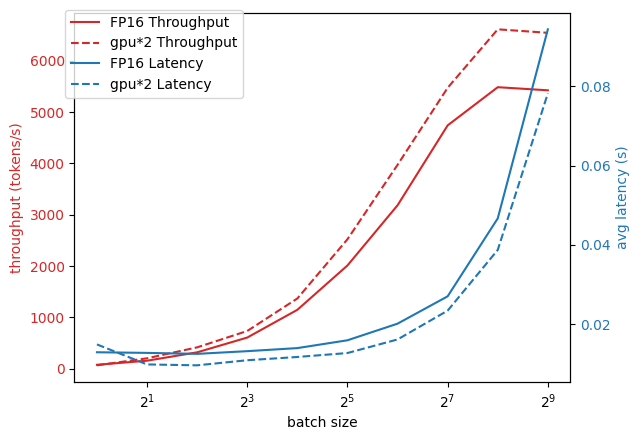

In [7]:
render_plot(
    batch_sizes,
    throughputs,
    latencies,
    throughputs_2_gpu,
    latencies_2_gpu,
    "batch size",
    "throughput (tokens/s)",
    "avg latency (s)"
)